## Stacking Ensemble

Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. 

The base level models are trained based on complete training set then the meta-model is trained on the outputs of base level model as features. 

The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.

### Import Dependencies

In [0]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier

from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

### Load IRIS Dataset

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]   # select only first two features sepal length, petal length
y = iris.target

print(iris.feature_names)
print(X.shape)
print(X[0,:])
print(iris.data[0,:])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 2)
[5.1 1.4]
[5.1 3.5 1.4 0.2]


### Decide Classifiers to be used in the Stacking Ensemble

In [0]:
# Level-0 - Base Classifiers
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
#clf2 = DecisionTreeClassifier(random_state=1)
clf3 = GaussianNB()

# Level-1 - Meta Classifier
lr = LogisticRegression()

# Stacking Ensemble
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)


label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
#label = ['KNN', 'Decision Tree', 'Naive Bayes', 'Stacking Classifier']

# List of all the classifiers
clf_list = [clf1, clf2, clf3, sclf]



### Train the Classifiers

Lets train the classifiers with training dataset and target labels. Apply  3-fold cross validation to evaluate model performances. Store the model performances in two Python lists for future plotting.

Accuracy: 0.93 (+/- 0.02) [KNN]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.90 (+/- 0.03) [Naive Bayes]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

Accuracy: 0.95 (+/- 0.03) [Stacking Classifier]


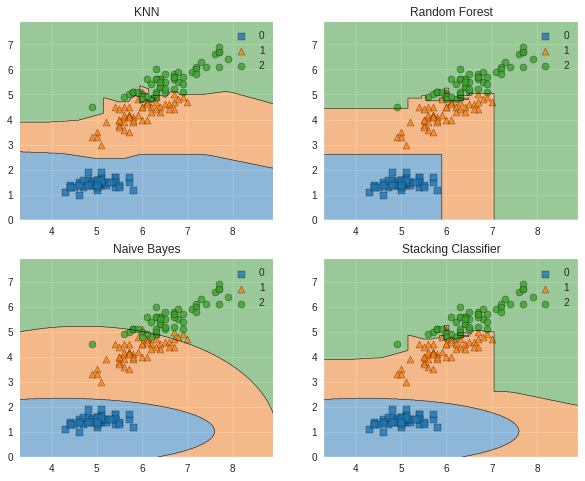

In [6]:

# Two empty lists to keep track of statictics (mean and standard deviation of the scores of various classifiers)
clf_cv_mean = []
clf_cv_std = []

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):
       
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy') # 3-fold cross-validation
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())  # mean acccuracy score for the 3-fold cross validation...save in a list
    clf_cv_std.append(scores.std()) # standard deviation of the scores for the 3-fold cross validation...save in a list
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()

The stacking ensemble is illustrated in the figure above. It consists of k-NN, Random Forest and Naive Bayes base classifiers whose predictions are combined by Lostic Regression as a meta-classifier. 
We can see the blending of decision boundaries achieved by the stacking classifier.

## Plot Accuracy of the Classifiers

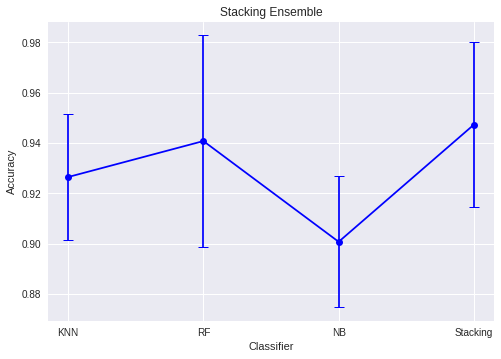

In [7]:
# Plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
#plt.xticks(range(4), ['KNN', 'DT', 'NB', 'Stacking'])        

plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Stacking Ensemble')
plt.show()

## Plot the Learning Curve

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

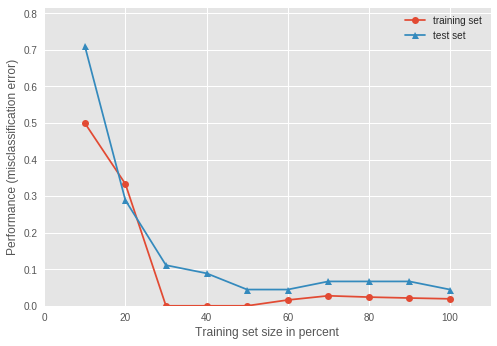

In [8]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

We can see that stacking achieves high accuracy.

In this particular example, Random Forest classifier performs the best, even better than stacking ensemble.

Learning curves shows no signs of overfitting.


